In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

## Preprocessing Part 1

Di bawah ini adalah penjelasan singkat tentang setiap poin yang Anda sebutkan dalam konteks pemrosesan teks:

1. **Remove br:**
   

2. **Lowercase:**
   - Mengubah semua huruf dalam teks menjadi huruf kecil (lowercase). Tujuan utamanya adalah untuk menghindari perbedaan huruf besar dan huruf kecil yang dapat memengaruhi pemrosesan teks.

3. **Remove Contraction:**
   - Menggantikan kontraksi kata dengan bentuk lengkapnya. Misalnya, mengubah "can't" menjadi "cannot" atau "I've" menjadi "I have". Ini membantu dalam konsistensi dan pemahaman teks.

4. **Remove Number:**
   - Menghapus semua karakter numerik dari teks. Ini biasanya digunakan jika Anda tidak ingin mempertahankan angka dalam teks.

5. **Remove Punctuation:**
   - Menghapus semua tanda baca, seperti koma, titik, tanda seru, dan sebagainya. Ini membantu dalam menghilangkan karakter yang tidak relevan dalam analisis teks.

6. **Remove Stopwords:**
   - Menghapus kata-kata umum yang tidak memiliki nilai informatif tinggi dalam analisis teks. Contoh stopwords dalam bahasa Inggris adalah "the," "and," "is," dan sebagainya. Penghapusan stopwords membantu dalam fokus pada kata-kata kunci.

7. **Remove Whitespace:**
   - Menghapus spasi ekstra atau karakter whitespace (seperti spasi, tab, dan baris baru) dari teks. Ini membantu dalam menjaga konsistensi dan kebersihan teks.

Pemrosesan teks seringkali melibatkan beberapa atau semua langkah ini, tergantung pada kebutuhan dan tujuan analisis Anda.

In [2]:
df = pd.read_csv('IMDB Dataset Sentiment - Sampling.csv')
df.head()

,review,sentiment
0,I don't know how or why this film has a meager...,positive
1,For a long time it seemed like all the good Ca...,positive
2,Terry Gilliam's and David Peoples' teamed up t...,positive
3,What is there to say about an anti-establishme...,positive
4,This movie was made only 48 years after the en...,positive


In [3]:
# label
# 0: positive or neutral
# 1: negative

df['label'] = np.where(df['sentiment']=='negative', 1, 0)
df

,review,sentiment,label
0,I don't know how or why this film has a meager...,positive,0
1,For a long time it seemed like all the good Ca...,positive,0
2,Terry Gilliam's and David Peoples' teamed up t...,positive,0
3,What is there to say about an anti-establishme...,positive,0
4,This movie was made only 48 years after the en...,positive,0
...,...,...,...
9995,Very interesting to find another reviewer who ...,negative,1
9996,When I began watching The Muppets Take Manhatt...,negative,1
9997,i was disappointed in this documentary.i thoug...,negative,1
9998,"The acting wasn't great, the story was full of...",negative,1


In [4]:
df['label'].value_counts()

# 0: positive or neutral
# 1: negative

0    5000
1    5000
Name: label, dtype: int64

### 0. Hapus mention

In [5]:
def remove_br_tags(text):
    cleaned_text = text.replace('<br />', '')
    return cleaned_text

### 1. Lowercase

In [6]:
def to_lower(text):
    return text.lower()

### 2. Remove contraction

In [7]:
contractions_dict = {    
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i had",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "iit will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that had",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they had",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
}

In [8]:
def remove_contraction(text):

    list_kata = text.split()
    list_hasil = []

    for kata in list_kata:

        if kata in contractions_dict.keys():
            list_hasil.append(contractions_dict[kata])
        else:
            list_hasil.append(kata)

    hasil = ' '.join(list_hasil)
    return hasil 

### 3. Remove number

In [9]:
def remove_number(text):
    hasil = ''.join([char for char in text if not char.isnumeric()])
    return hasil

### 4. Remove punctuation

In [10]:
from string import punctuation

In [11]:
def remove_punctuation(text):
    hasil = ''.join([char for char in text if not char in punctuation])
    return hasil

### 5. Remove stopwords

In [12]:
import nltk
from nltk.corpus import stopwords

In [13]:
nltk.download('stopwords')
nltk.download('punkt') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
stop_words = stopwords.words('english')
stop_words.remove('not')

In [15]:
def remove_stopwords(text):
    hasil = ' '.join([kata for kata in text.split() if kata not in stop_words])
    return hasil 

### 6. Remove whitespace

In [16]:
def remove_whitespace(text):
    hasil = ' '.join(text.split())
    return hasil

In [17]:
df['text-prep'] = df['review'].apply(remove_br_tags)
df['text-prep'] = df['text-prep'].apply(to_lower)
df['text-prep'] = df['text-prep'].apply(remove_contraction)
df['text-prep'] = df['text-prep'].apply(remove_number)
df['text-prep'] = df['text-prep'].apply(remove_punctuation)
df['text-prep'] = df['text-prep'].apply(remove_stopwords)
df['text-prep'] = df['text-prep'].apply(remove_whitespace)

df.head()

,review,sentiment,label,text-prep
0,I don't know how or why this film has a meager...,positive,0,not know film meager rating imdb film accompan...
1,For a long time it seemed like all the good Ca...,positive,0,long time seemed like good canadian actors hea...
2,Terry Gilliam's and David Peoples' teamed up t...,positive,0,terry gilliams david peoples teamed create one...
3,What is there to say about an anti-establishme...,positive,0,say antiestablishment film produced time colou...
4,This movie was made only 48 years after the en...,positive,0,movie made years end civil warmost likely anti...


In [18]:
nltk.download('wordnet')
from nltk.stem import SnowballStemmer, WordNetLemmatizer 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
lemmatizer = WordNetLemmatizer()

In [20]:
def lemmatize(text):

    list_hasil = []

    for sentence in nltk.sent_tokenize(text):   # pecah paragraf menjadi kalimat-kalimat
        for word in nltk.word_tokenize(sentence): # pecah kalimat menjadi kata-kata
            list_hasil.append(lemmatizer.lemmatize(word))   # ubah kata ke kata dasarnya

    hasil = ' '.join(list_hasil)
    return hasil 

---
## Combine Preprocessing Part 1 & Part 2

In [21]:
df['text-prep-lemm'] = df['text-prep'].apply(lemmatize)

df.head()

,review,sentiment,label,text-prep,text-prep-lemm
0,I don't know how or why this film has a meager...,positive,0,not know film meager rating imdb film accompan...,not know film meager rating imdb film accompan...
1,For a long time it seemed like all the good Ca...,positive,0,long time seemed like good canadian actors hea...,long time seemed like good canadian actor head...
2,Terry Gilliam's and David Peoples' teamed up t...,positive,0,terry gilliams david peoples teamed create one...,terry gilliams david people teamed create one ...
3,What is there to say about an anti-establishme...,positive,0,say antiestablishment film produced time colou...,say antiestablishment film produced time colou...
4,This movie was made only 48 years after the en...,positive,0,movie made years end civil warmost likely anti...,movie made year end civil warmost likely antic...


## EDA (Text Exploration)

### 1. Word Frequency

In [22]:
df['text-prep-lemm']

0       not know film meager rating imdb film accompan...
1       long time seemed like good canadian actor head...
2       terry gilliams david people teamed create one ...
3       say antiestablishment film produced time colou...
4       movie made year end civil warmost likely antic...
                              ...                        
9995    interesting find another reviewer exact reacti...
9996    began watching muppets take manhattan choppy p...
9997    disappointed documentaryi thought would second...
9998    acting not great story full simplistic turn tr...
9999    two kind musical first glossy mgm production b...
Name: text-prep-lemm, Length: 10000, dtype: object

In [23]:
def word_freq(text):

    df_text = text.str.extractall('(\w+)') # ambil tiap kata dari tiap document
    df_text = df_text.reset_index()

    df_unique = df_text[0].value_counts()
    df_unique = df_unique.to_frame().reset_index().rename(columns={'index':'word', 0:'freq'})

    return df_unique

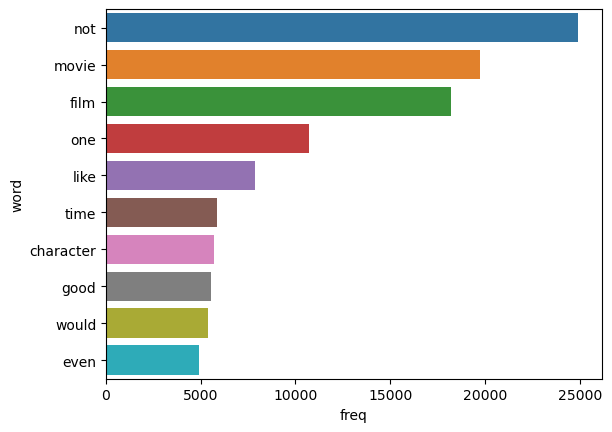

In [24]:
# Top 10 most frequent words
data = word_freq(df['text-prep-lemm'])
sns.barplot(data=data.head(10), x='freq', y='word');

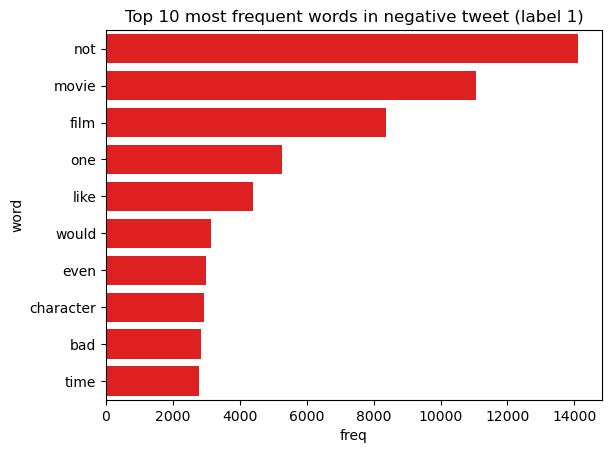

In [25]:
# Top 10 most frequent words in negative tweet (1) 
data = word_freq(df[df['label']==1]['text-prep-lemm'])

sns.barplot(data=data.head(10), x='freq', y='word', color='red')
plt.title('Top 10 most frequent words in negative tweet (label 1)'); 

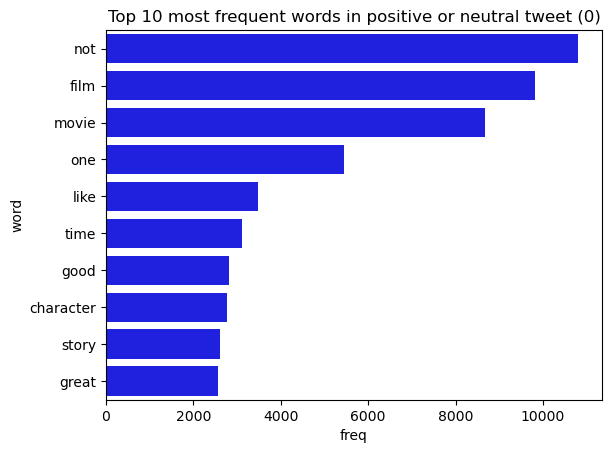

In [26]:
# Top 10 most frequent words in positive or neutral tweet (0)
data = word_freq(df[df['label']==0]['text-prep-lemm'])

sns.barplot(data=data.head(10), x='freq', y='word', color='blue')
plt.title('Top 10 most frequent words in positive or neutral tweet (0)'); 

### 2. Length of Document

In [27]:
df['len_char'] = df['text-prep-lemm'].str.len()
df.head()

,review,sentiment,label,text-prep,text-prep-lemm,len_char
0,I don't know how or why this film has a meager...,positive,0,not know film meager rating imdb film accompan...,not know film meager rating imdb film accompan...,1392
1,For a long time it seemed like all the good Ca...,positive,0,long time seemed like good canadian actors hea...,long time seemed like good canadian actor head...,446
2,Terry Gilliam's and David Peoples' teamed up t...,positive,0,terry gilliams david peoples teamed create one...,terry gilliams david people teamed create one ...,3588
3,What is there to say about an anti-establishme...,positive,0,say antiestablishment film produced time colou...,say antiestablishment film produced time colou...,1054
4,This movie was made only 48 years after the en...,positive,0,movie made years end civil warmost likely anti...,movie made year end civil warmost likely antic...,613


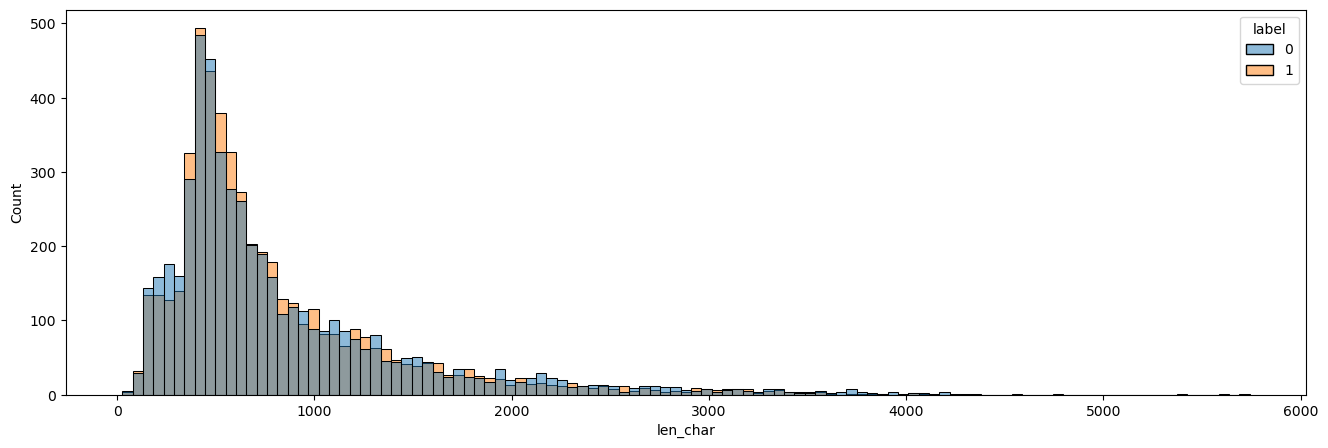

In [28]:
plt.figure(figsize=(16,5))
sns.histplot(data=df, x='len_char', hue='label');

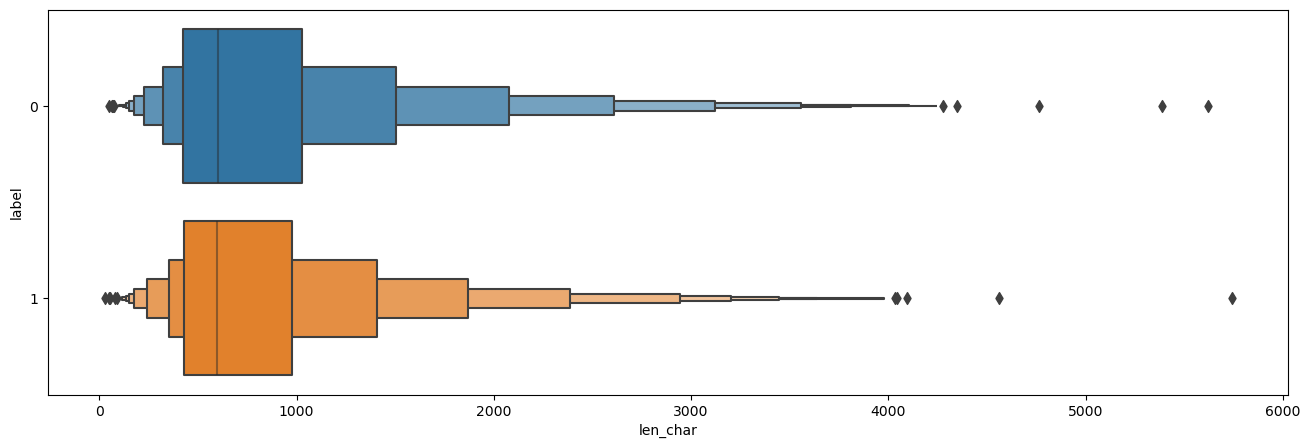

In [29]:
df['label'] = df['label'].astype(str)

plt.figure(figsize=(16,5))
sns.boxenplot(data=df, x='len_char', y='label');

In [30]:
df['label'] = df['label'].astype(int)

---

## Classification

In [31]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix

### Clean Dataset 

In [32]:
df_clean = df[['text-prep-lemm', 'sentiment', 'label']]
df_clean.head()

,text-prep-lemm,sentiment,label
0,not know film meager rating imdb film accompan...,positive,0
1,long time seemed like good canadian actor head...,positive,0
2,terry gilliams david people teamed create one ...,positive,0
3,say antiestablishment film produced time colou...,positive,0
4,movie made year end civil warmost likely antic...,positive,0


### Define text and y

In [33]:
text = df_clean['text-prep-lemm']
y = df_clean['label']

In [34]:
y.value_counts() / len(y)

0    0.5
1    0.5
Name: label, dtype: float64

### Data Splitting

In [35]:
text_train, text_test, y_train, y_test = train_test_split(text, y, test_size=0.25, stratify=y, random_state=42)

### Benchmark Model

In [36]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

logreg = LogisticRegression(random_state=42)
xgb = XGBClassifier(random_state = 42)
rf = RandomForestClassifier(random_state=42)

vectorizer = TfidfVectorizer(norm=None)

list_model = [logreg, rf, xgb]

fit_time_arr = []
score_time_arr = []     
test_accuracy_arr = []    
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []

metrics = {'balanced_accuracy': 'balanced_accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f1': 'f1'}

for i in list_model:
    crossval = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    estimator = Pipeline([
        ('vectorizer', vectorizer),
        ('model', i),
    ])

    scores = cross_validate(estimator, text_train, y_train,cv=crossval, scoring=metrics)
    fit_time_arr.append(scores['fit_time'].mean())
    score_time_arr.append(scores['score_time'].mean())
    test_accuracy_arr.append(scores['test_balanced_accuracy'].mean())
    test_precision_arr.append(scores['test_precision'].mean())
    test_recall_arr.append(scores['test_recall'].mean())
    test_f1_arr.append(scores['test_f1'].mean())

model_bench = pd.DataFrame({
    'model': ['logreg', 'rf', 'xgboost'],
    'fit_time': fit_time_arr,
    'score_time': score_time_arr,
    'accuracy': test_accuracy_arr,
    'precision': test_precision_arr,
    'recall': test_recall_arr,
    'f1': test_f1_arr,
})

model_bench

,model,fit_time,score_time,accuracy,precision,recall,f1
0,logreg,2.783855,0.326813,0.861733,0.867165,0.854400,0.860635
1,rf,48.692324,0.282015,0.837867,0.850472,0.820000,0.834836
2,xgboost,4.178816,0.259496,0.834267,0.846551,0.817067,0.831304


## Hyperparameter Tuning

In [37]:
vectorizer1 = CountVectorizer(ngram_range=(1,1))
vectorizer2 = TfidfVectorizer(norm=None)

In [38]:
hyperparam_space = {
    'model__C': [0.1, 1, 10],
    'model__penalty': ['l1','l2'],
    'model__solver': ['liblinear', 'saga'],
    'vectorizer': [vectorizer1, vectorizer2],
    'vectorizer__ngram_range': [(1,1), (1,2)],
}

# pipeline
model_pipe = Pipeline([ 
    ('vectorizer', vectorizer1),
    ('model', logreg)
])

# Randomized Search
random_search = RandomizedSearchCV(
    estimator= model_pipe,
    param_distributions= hyperparam_space,
    scoring='recall',
    cv=5,
    random_state=42,
    n_jobs=-1,
    n_iter= 50
)

In [39]:
# fit
random_search.fit(text_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                             ('model',
                                              LogisticRegression(random_state=42))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'model__C': [0.1, 1, 10],
                                        'model__penalty': ['l1', 'l2'],
                                        'model__solver': ['liblinear', 'saga'],
                                        'vectorizer': [CountVectorizer(),
                                                       TfidfVectorizer(ngram_range=(1,
                                                                                    2),
                                                                       norm=None)],
                                        'vectorizer__ngram_range': [(1, 1),
                                                                    (1, 2)]},
                   random_state=42, scoring='recall')

In [40]:
random_search.best_params_

{'vectorizer__ngram_range': (1, 2),
 'vectorizer': TfidfVectorizer(ngram_range=(1, 2), norm=None),
 'model__solver': 'liblinear',
 'model__penalty': 'l2',
 'model__C': 10}

In [41]:
random_search.best_score_

0.8658666666666666

## Predict to Test Set

Before Tuning

In [42]:
from sklearn.metrics import precision_score

vectorizer = TfidfVectorizer(norm=None)

# pipeline
model_pipe = Pipeline([ 
    ('vectorizer', vectorizer),
    ('model', logreg)
])

model_pipe.fit(text_train, y_train)
y_pred_before = model_pipe.predict(text_test)
precision_score(y_test, y_pred_before)

0.8679245283018868

After Tuning

In [43]:
random_search.best_estimator_

Pipeline(steps=[('vectorizer', TfidfVectorizer(ngram_range=(1, 2), norm=None)),
                ('model',
                 LogisticRegression(C=10, random_state=42,
                                    solver='liblinear'))])

In [44]:
best_model = random_search.best_estimator_
best_model.fit(text_train, y_train)
y_pred_after = best_model.predict(text_test)


precision_score(y_test, y_pred_after)

0.8875838926174496

Text(0.5, 1.0, 'After Tuning')

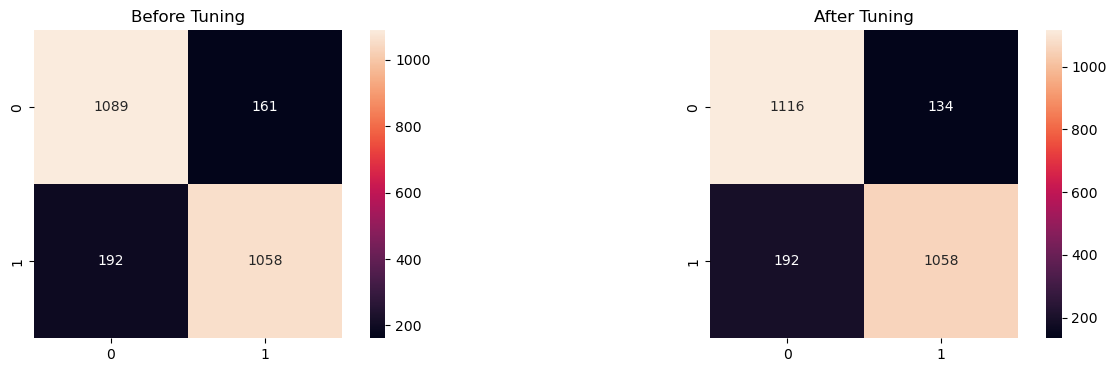

In [45]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_before), annot=True, fmt='.0f', square=True)
plt.title('Before Tuning')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_after), annot=True, fmt='.0f', square=True)
plt.title('After Tuning')


In [46]:
# Performa model meningkat setelah dilakukan hyperpameter tuning

print(precision_score(y_test, y_pred_before), 'Before hyperpameter tuning')
print(precision_score(y_test, y_pred_after), 'After hyperpameter tuning')

0.8679245283018868 Before hyperpameter tuning
0.8875838926174496 After hyperpameter tuning


In [48]:
import pickle

# pipeline
model_pipe = Pipeline([ 
    ('vectorizer', vectorizer),
    ('model', logreg)
])

model_pipe.fit(text_train, y_train)
model_pipe

Pipeline(steps=[('vectorizer', TfidfVectorizer(norm=None)),
                ('model', LogisticRegression(random_state=42))])

In [50]:
pickle.dump(model_pipe, open('model.sav', 'wb'))